In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy
import scipy.optimize as optimize

In [9]:
def obs_vel_map(matrix, r_max, r_t, v_t, incl, Psi_0, v_sys):
    """
    Function to calculate the circular velocity in each radius of the galaxy according 
    to the simplest model of a galaxy's rotation curve (velocity grows linearly at the 
    beginning and then is constant).
    
    Parameters:
    -----------
    y_x : Square matrix
    r_max : Maximum radius of the galaxy (limits)
    r_t : Distance at which the galaxy reaches the maximum speed
    v_t : Maximum speed of the galaxy
    incl :  inclination angle
    Psi_0 : position angle
    v_sys : systemic velocity
    
    Return:
    ----------
    v_los : Matrix of galaxy velocity along the line of sight
    """ 
    #x = np.arange(npix)
    # Array of x,y coordinates, an element for each pixel in the image
    #y = x
    #yy,xx = np.meshgrid(x,y)
    xx =  matrix[0]
    mask = matrix[1]
    yy = xx.transpose()
    #xx = data[0]
    #yy = data[1]
    npix = yy.shape[0]
    # central position of the array
    xc,yc = npix/2 -0.5, npix/2 -0.5
    # R and Psi matrix
    R = np.sqrt((xx-xc)**2 + (yy-yc)**2)
    Psi = np.arctan((yy-yc)/(xx-xc))
    Psi = np.rad2deg(Psi) + 90
    Psi[int(npix/2):,:] = Psi[int(npix/2):,:]+180
    # alpha and r matrix            
    alpha = np.sqrt(np.cos((Psi-Psi_0)*np.pi/180)**2 + (np.sin((Psi-Psi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
    r = R*alpha  # Real radius in galaxy in pixels calculated from the projection of them

    #Conversion factor from pixels to radius
    #pix2r = r_max/(npix/(2*np.cos(Psi_0*np.pi/180)))
    #r = r_pix*pix2r  #Distance in the units of the radius
                
    v_cir = -v_t*np.e**(-r/r_t)+v_t  
    #v_cir[r > r_max] = -0.001#'nan'     # If you want that outside the galaxy the matrix has nan values  
          

    v_los = v_sys + (v_cir/alpha)*np.sin(incl*np.pi/180)*np.cos((Psi-Psi_0)*np.pi/180)
    v_los[r > r_max] =  'nan'#v_sys #v_los.max()#'nan'
    v_los = v_los*mask
    v_los = v_los[~np.isnan(mask)]
    
    return v_los.ravel()

In [10]:
def obs_vel_map4plot(xx, r_max, r_t, v_t, incl, Psi_0, v_sys):
    """
    Function to calculate the circular velocity in each radius of the galaxy according 
    to the simplest model of a galaxy's rotation curve (velocity grows linearly at the 
    beginning and then is constant).
    
    Parameters:
    -----------
    y_x : Square matrix
    r_max : Maximum radius of the galaxy (limits)
    r_t : Distance at which the galaxy reaches the maximum speed
    v_t : Maximum speed of the galaxy
    incl :  inclination angle
    Psi_0 : position angle
    v_sys : systemic velocity
    
    Return:
    ----------
    v_los : Matrix of galaxy velocity along the line of sight
    """ 
    #x = np.arange(npix)
    # Array of x,y coordinates, an element for each pixel in the image
    #y = x
    #yy,xx = np.meshgrid(x,y)
    yy = xx.transpose()
    #xx = data[0]
    #yy = data[1]
    npix = yy.shape[0]
    # central position of the array
    xc,yc = npix/2 -0.5, npix/2 -0.5
    # R and Psi matrix
    R = np.sqrt((xx-xc)**2 + (yy-yc)**2)
    Psi = np.arctan((yy-yc)/(xx-xc))
    Psi = np.rad2deg(Psi) + 90
    Psi[int(npix/2):,:] = Psi[int(npix/2):,:]+180
    # alpha and r matrix            
    alpha = np.sqrt(np.cos((Psi-Psi_0)*np.pi/180)**2 + (np.sin((Psi-Psi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
    r = R*alpha  # Real radius in galaxy in pixels calculated from the projection of them

    #Conversion factor from pixels to radius
    #pix2r = r_max/(npix/(2*np.cos(Psi_0*np.pi/180)))
    #r = r_pix*pix2r  #Distance in the units of the radius
                
    v_cir = -v_t*np.e**(-r/r_t)+v_t  
    #v_cir[r > r_max] = -0.001#'nan'     # If you want that outside the galaxy the matrix has nan values  
          

    v_los = v_sys + (v_cir/alpha)*np.sin(incl*np.pi/180)*np.cos((Psi-Psi_0)*np.pi/180)
    v_los[r > r_max] =  'nan'#v_sys #v_los.max()#'nan'
             
    return v_los.ravel()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

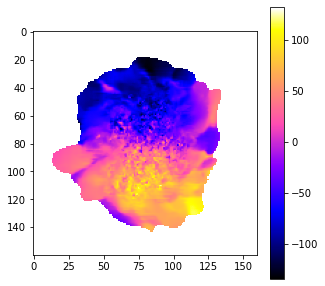

In [13]:
x = np.arange(160)
y = np.arange(160)
yy,xx = np.meshgrid(x,y)

v = np.loadtxt("velmap.txt")
v_max = np.nanmax(v)
v_min = np.nanmin(v)
fig = plt.figure(figsize=(5, 5))
plt.imshow(v,cmap="gnuplot2", vmax = v_max, vmin = v_min )
plt.colorbar()

mask = v/v                           #[60, 55, 250, -30, 90, -3]

popt,pconv = optimize.curve_fit(obs_vel_map, [xx, mask], v[~np.isnan(v)], p0 = [60, 55, 250, 30, 270, -3],sigma=None,check_finite= False) 
print(popt) 

fig = plt.figure(figsize=(5, 5))
fit = obs_vel_map4plot(xx, *popt).reshape(160, 160)
fit[fit ==0]= 'nan' 
plt.imshow(fit,cmap="gnuplot2", vmax = v_max, vmin = v_min )
plt.colorbar()